In [2]:
# Importing necessary libraries

import pandas as pd

In [3]:
# Loading datasets into Pandas DataFrames

agriculture_df = pd.read_csv(r"C:\Users\beemr\Downloads\ICRISAT-District Level Data.csv\ICRISAT-District Level Data.csv")
climate_df = pd.read_csv(r"C:\Users\beemr\Downloads\7160_KEYS.csv")

import zipfile

# Defining the path to the ZIP file
zip_file_path = r"C:\Users\beemr\Downloads\archive (1).zip"

# Extracting the CSV file you want to load (assuming you want to load 'temperature.csv')
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract('data/temperature.csv', 'extracted_data')

# Loading the extracted CSV file into a DataFrame
temperature_df = pd.read_csv('extracted_data/data/temperature.csv')

# Displaying the first few rows of the temperature DataFrame
print("Temperature Dataset:")
print(temperature_df.head())


# Displaying the first few rows of each dataset to inspect the data
print("Indian Agriculture Dataset:")
print(agriculture_df.head())

print("\nDistrict Level Climate Vulnerability Indicators:")
print(climate_df.head())



Temperature Dataset:
   YEAR  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC
0  1961   24.00    18.98    26.11    27.06    21.17
1  1962   24.04    18.91    25.91    27.14    21.47
2  1963   24.15    19.07    25.57    27.21    22.04
3  1964   24.10    18.83    26.38    26.90    21.58
4  1965   24.07    19.22    25.24    27.08    22.10
Indian Agriculture Dataset:
   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1   

In [4]:
# Checking the data types of all columns in Indian Agriculture Dataset

print("Data Types of Columns in Indian Agriculture Dataset:")
print(agriculture_df.dtypes)

Data Types of Columns in Indian Agriculture Dataset:
Dist Code                                 int64
Year                                      int64
State Code                                int64
State Name                               object
Dist Name                                object
                                         ...   
VEGETABLES AREA (1000 ha)               float64
FRUITS AND VEGETABLES AREA (1000 ha)    float64
POTATOES AREA (1000 ha)                 float64
ONION AREA (1000 ha)                    float64
FODDER AREA (1000 ha)                   float64
Length: 80, dtype: object


In [53]:
agriculture_df.shape

(16146, 80)

In [5]:
# Displaying the column names in the dataset

print(agriculture_df.columns)

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

In [6]:
# Handling missing values for numerical columns using mean imputation

numerical_columns = agriculture_df.select_dtypes(include=['float64', 'int64']).columns
agriculture_df[numerical_columns] = agriculture_df[numerical_columns].fillna(agriculture_df[numerical_columns].mean())

# Handling missing values for categorical columns using mode imputation

categorical_columns = agriculture_df.select_dtypes(include=['object']).columns
agriculture_df[categorical_columns] = agriculture_df[categorical_columns].fillna(agriculture_df[categorical_columns].mode().iloc[0])

# Checking if there are any remaining missing values

missing_values = agriculture_df.isnull().sum()

print("Remaining missing values after imputation:")
print(missing_values)


Remaining missing values after imputation:
Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64


In [7]:
# Descriptive Statistics

descriptive_stats = agriculture_df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
          Dist Code          Year    State Code  RICE AREA (1000 ha)  \
count  16146.000000  16146.000000  16146.000000         16146.000000   
mean     269.769231   1991.496841      9.568562           128.593192   
std      278.309125     15.011185      4.988538           160.078825   
min        1.000000   1966.000000      1.000000            -1.000000   
25%       78.000000   1978.000000      6.000000            10.400000   
50%      156.000000   1991.000000     10.000000            66.800000   
75%      241.000000   2005.000000     12.000000           191.390000   
max      917.000000   2017.000000     20.000000          1154.230000   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
count                 16146.000000            16146.000000   
mean                    224.889565             1486.924784   
std                     326.629828              956.185281   
min                      -1.000000               -1.000000   
25%              

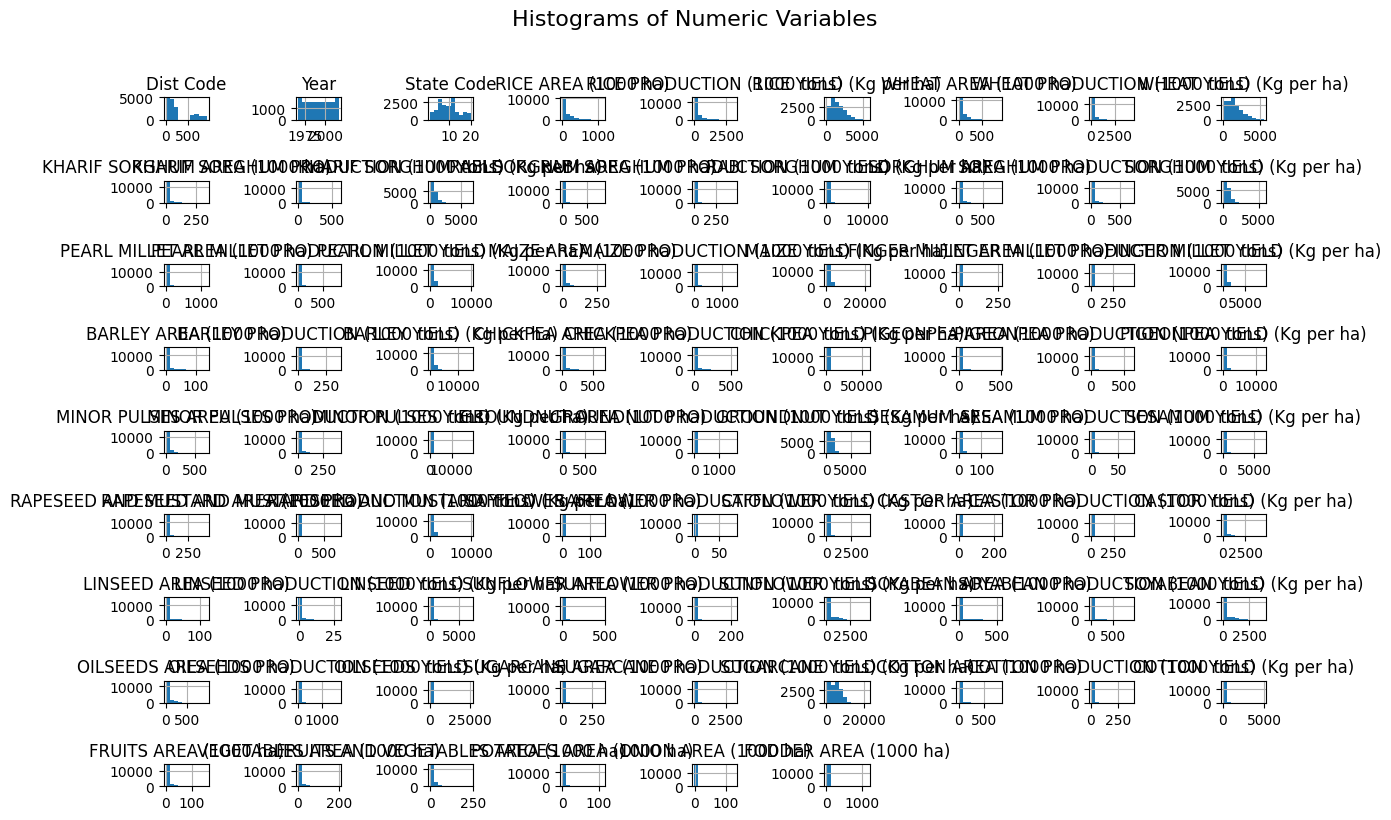

In [10]:
import matplotlib.pyplot as plt

# Histogram for numeric variables

agriculture_df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numeric Variables', x=0.5, y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [57]:
# Checking for missing values

print("Missing values in District Level Climate Vulnerability Indicators:")
print(climate_df.isnull().sum())

Missing values in District Level Climate Vulnerability Indicators:
srcDistrictName                           0
srcStateName                              0
srcYear                                   0
Country                                   0
StateCode                                 0
                                         ..
WeighingRatio_Percentage_LandAreaRural    0
WeighingRatio_LandArea                    0
WeighingRatio_Percentage_LandArea         0
YearCode                                  0
Year                                      0
Length: 72, dtype: int64


In [56]:
# Explore the data distribution

print("Summary statistics of District Level Climate Vulnerability Indicators:")
print(climate_df.describe())


Summary statistics of District Level Climate Vulnerability Indicators:
       srcYear   StateCode  DistrictCode  TotalPopulation  \
count    815.0  815.000000    815.000000     8.150000e+02   
mean    2021.0   17.912883    372.123926     1.437317e+06   
std        0.0    9.291671    208.558715     1.435637e+06   
min     2021.0    1.000000      1.000000     1.130000e+02   
25%     2021.0    9.000000    206.500000     3.783675e+05   
50%     2021.0   18.000000    358.000000     1.089263e+06   
75%     2021.0   24.000000    557.500000     1.980708e+06   
max     2021.0   37.000000    737.000000     1.000978e+07   

       TotalPopulationUrban  TotalPopulationRural  TotalPopulationMale  \
count          8.150000e+02          8.150000e+02         8.150000e+02   
mean           4.187953e+05          1.018522e+06         7.392027e+05   
std            7.951993e+05          9.682497e+05         7.443225e+05   
min            0.000000e+00          0.000000e+00         5.300000e+01   
25%      

In [54]:
climate_df.shape

(815, 72)

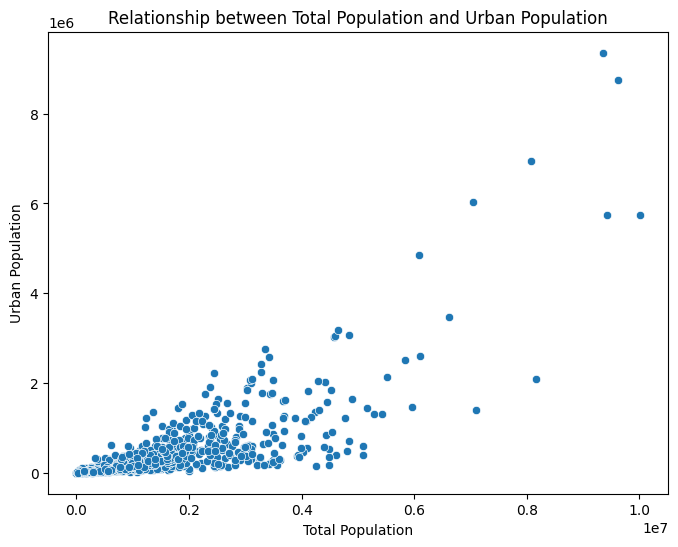

In [9]:
import numpy as np

# Filter numerical columns
numerical_columns = climate_df.select_dtypes(include=np.number).columns

# Fill missing values with mean for numerical columns only
climate_df[numerical_columns] = climate_df[numerical_columns].fillna(climate_df[numerical_columns].mean())


# Step 2: Data Cleaning 
# Remove duplicate records if present
climate_df.drop_duplicates(inplace=True)

# Step 3: Further Data Exploration
# Exploring relationships between variables using visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for TotalPopulation vs. TotalPopulationUrban
plt.figure(figsize=(8, 6))
sns.scatterplot(data=climate_df, x='TotalPopulation', y='TotalPopulationUrban')
plt.title('Relationship between Total Population and Urban Population')
plt.xlabel('Total Population')
plt.ylabel('Urban Population')
plt.show()

In [10]:
# Checking for missing values
missing_values = temperature_df.isnull().sum()

# Displaying the count of missing values for each column
print("Missing values per column:")
print(missing_values)


Missing values per column:
YEAR       0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64


In [12]:
# Replacing missing values with the mean of each column

temperature_df.fillna(temperature_df.mean(), inplace=True)

In [13]:
# Removing duplicate rows based on all columns

temperature_df.drop_duplicates(inplace=True)

In [14]:
temperature_df.columns

Index(['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], dtype='object')

In [55]:
temperature_df.shape

(58, 6)

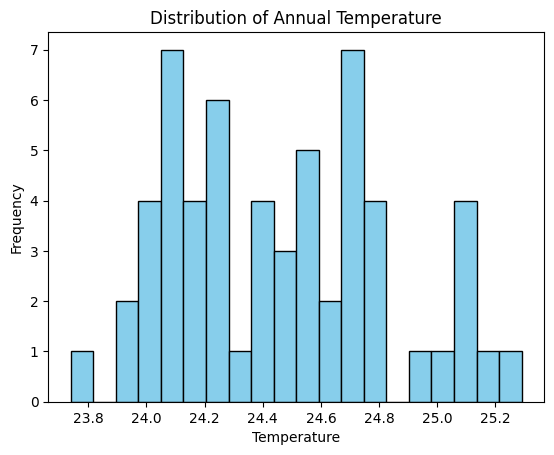

In [15]:
import matplotlib.pyplot as plt

# Histogram of annual temperature (assuming 'ANNUAL' column holds the data)
plt.hist(temperature_df['ANNUAL'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Temperature')
plt.show()


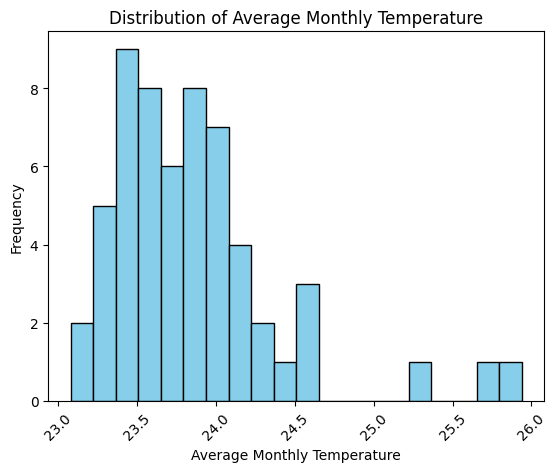

In [16]:
import matplotlib.pyplot as plt

# Assuming columns like 'JAN-FEB' have average temperatures
months = ['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']
temperatures = temperature_df[months].mean(axis=1)  # Calculate mean across month columns

# Histogram of average monthly temperature
plt.hist(temperatures, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average Monthly Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Monthly Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


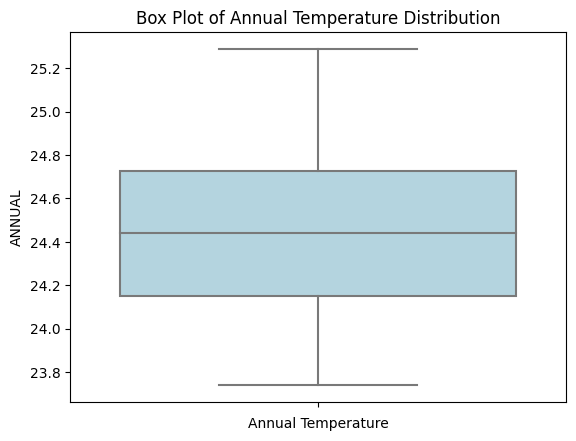

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ANNUAL' column holds the annual temperature data
sns.boxplot(
    y='ANNUAL',  # Set variable for y-axis (ANNUAL column)
    data=temperature_df,  # Specify the DataFrame containing the data
    color='lightblue'  # Set box color
)

# Optional customizations using Matplotlib (adjust as needed)
plt.xlabel('Annual Temperature')  # Label for x-axis
plt.title('Box Plot of Annual Temperature Distribution')  # More informative title
plt.show()



In [20]:
agriculture_df.columns

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

In [21]:
climate_df.columns

Index(['srcDistrictName', 'srcStateName', 'srcYear', 'Country', 'StateCode',
       'StateName', 'DistrictCode', 'DistrictName', 'TotalPopulation',
       'TotalPopulationUrban', 'TotalPopulationRural', 'TotalPopulationMale',
       'TotalPopulationMaleUrban', 'TotalPopulationMaleRural',
       'TotalPopulationFemale', 'TotalPopulationFemaleUrban',
       'TotalPopulationFemaleRural', 'NumberOfHouseholds',
       'NumberOfHouseholdsUrban', 'NumberOfHouseholdsRural', 'LandAreaUrban',
       'LandAreaRural', 'LandArea', 'LandAreaMappingError%',
       'LandAreaUrbanMappingError%', 'LandAreaRuralMappingError%',
       'TotalPopulationMappingError%', 'TotalPopulationUrbanMappingError%',
       'TotalPopulationRuralMappingError%', 'TotalPopulationMaleMappingError%',
       'TotalPopulationMaleUrbanMappingError%',
       'TotalPopulationMaleRuralMappingError%',
       'TotalPopulationFeMaleMappingError%',
       'TotalPopulationFeMaleUrbanMappingError%',
       'TotalPopulationFeMaleRuralMap

In [22]:
temperature_df.columns

Index(['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], dtype='object')

In [26]:
agriculture_df.head(20)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
5,1,1971,14,Chhattisgarh,Durg,581.8,412.9,709.69,44.4,25.8,...,2000.00,0.0,0.0,0.0,5.42,7.48,12.91,0.01,0.54,0.38
6,1,1972,14,Chhattisgarh,Durg,582.2,381.0,654.41,39.6,20.6,...,2000.00,0.0,0.0,0.0,5.48,7.53,13.01,0.01,0.55,0.26
7,1,1973,14,Chhattisgarh,Durg,600.0,471.9,786.50,37.3,18.6,...,6000.00,0.0,0.0,0.0,5.30,7.60,12.90,0.01,0.53,0.14
8,1,1974,14,Chhattisgarh,Durg,587.4,219.0,372.83,36.5,22.4,...,1875.00,0.0,0.0,0.0,5.21,7.44,12.64,0.03,0.45,0.06
9,1,1975,14,Chhattisgarh,Durg,598.3,454.0,758.82,49.2,27.8,...,1750.00,0.0,0.0,0.0,5.11,7.86,12.97,0.05,0.52,0.08


In [27]:
climate_df.head(10)

,srcDistrictName,srcStateName,srcYear,Country,StateCode,StateName,DistrictCode,DistrictName,TotalPopulation,TotalPopulationUrban,...,WeighingRatio_NumberOfHouseholdsRural,WeighingRatio_Percentage_NumberOfHouseholdsRural,WeighingRatio_LandAreaUrban,WeighingRatio_Percentage_LandAreaUrban,WeighingRatio_LandAreaRural,WeighingRatio_Percentage_LandAreaRural,WeighingRatio_LandArea,WeighingRatio_Percentage_LandArea,YearCode,Year
0,Anantnag,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,1,ANANTNAG,1078692,282887,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
1,Budgam,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,2,Budgam,744234,97912,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
2,Baramulla,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,3,BARAMULLA,1011629,182500,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
3,Doda,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,4,DODA,409936,32689,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
4,Jammu,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,5,JAMMU,1529958,765013,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
5,Kathua,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,7,KATHUA,616435,89713,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
6,Kupwara,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,8,KUPWARA,870354,104729,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
7,Poonch,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,10,POONCH,476835,38630,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
8,Pulwama,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,11,PULWAMA,560440,80462,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021
9,Rajauri,Jammu and Kashmir,2021,India,1,JAMMU AND KASHMIR,12,RAJOURI,642415,52314,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2021,2021


In [51]:
duplicates = merged_df.duplicated()
print(duplicates.sum())  # This will tell you how many duplicates exist


0


In [68]:
# Rename the 'StateName' column in the climate dataset to 'State Name'
climate_df.rename(columns={'StateName': 'State Name'}, inplace=True)

# Convert state names to uppercase in agriculture dataset
agriculture_df['State Name'] = agriculture_df['State Name'].str.upper()

# Merge the datasets on the 'State Name' column
merged_df = pd.merge(agriculture_df, climate_df, on='State Name', how='inner')
print(merged_df.head())


   Dist Code  Year_x  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1    1966          14  CHHATTISGARH      Durg                548.0   
1          1    1966          14  CHHATTISGARH      Durg                548.0   
2          1    1966          14  CHHATTISGARH      Durg                548.0   
3          1    1966          14  CHHATTISGARH      Durg                548.0   
4          1    1966          14  CHHATTISGARH      Durg                548.0   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        185.0                  337.59                  44.0   
2                        185.0                  337.59                  44.0   
3                        185.0                  337.59                  44.0   
4                        185.0                  337.59                  44.0   

   WHEAT PRODUCTION (1000 tons) 

In [67]:
# Export the merged dataset to a JSON file using Pandas
merged_df.to_json('merged_data.json', orient='records')

In [86]:
import pandas as pd

# Assuming merged_df is your DataFrame containing the merged dataset

# Specify the file path for the CSV file
csv_file_path = "merged_data.csv"

# Convert the DataFrame to a CSV file
merged_df.to_csv(csv_file_path, index=False)  

print("CSV file saved successfully:", csv_file_path)


CSV file saved successfully: merged_data.csv


In [88]:
import pandas as pd

# Define the function to filter data based on a condition
def filter_data(data, condition):
    filtered_df = data[condition]
    return filtered_df

# Load the merged dataset
merged_df = pd.read_csv("merged_data.csv")

# Define the condition for filtering
condition = merged_df['Dist Code'] < 100  

# Apply the filtering condition using the filter_data function
new_merged_data_df = filter_data(merged_df, condition)

# Display the filtered dataframe
print(new_merged_data_df)

        Dist Code  Year_agri  State Code    State Name Dist Name  \
0               1       1966          14  CHHATTISGARH      Durg   
1               1       1966          14  CHHATTISGARH      Durg   
2               1       1966          14  CHHATTISGARH      Durg   
3               1       1966          14  CHHATTISGARH      Durg   
4               1       1966          14  CHHATTISGARH      Durg   
...           ...        ...         ...           ...       ...   
208999         99       2017           7   MAHARASHTRA     Nasik   
209000         99       2017           7   MAHARASHTRA     Nasik   
209001         99       2017           7   MAHARASHTRA     Nasik   
209002         99       2017           7   MAHARASHTRA     Nasik   
209003         99       2017           7   MAHARASHTRA     Nasik   

        RICE AREA (1000 ha)  RICE PRODUCTION (1000 tons)  \
0                     548.0                        185.0   
1                     548.0                        185.0   
2  

In [ ]:
new_merged_data.columns

In [ ]:
csv_file_path = "/path/to/writable/directory/new_merged_data.csv"


In [ ]:
new_merged_data = pd.read_csv(csv_file_path)


In [80]:
print(new_merged_data.head())


   Dist Code  Year_x  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1    1966          14  CHHATTISGARH      Durg                548.0   
1          1    1966          14  CHHATTISGARH      Durg                548.0   
2          1    1966          14  CHHATTISGARH      Durg                548.0   
3          1    1966          14  CHHATTISGARH      Durg                548.0   
4          1    1966          14  CHHATTISGARH      Durg                548.0   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        185.0                  337.59                  44.0   
2                        185.0                  337.59                  44.0   
3                        185.0                  337.59                  44.0   
4                        185.0                  337.59                  44.0   

   WHEAT PRODUCTION (1000 tons) 

In [81]:
print(csv_file_path)


/path/to/writable/directory/new_merged_data.csv


In [83]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('new_merged_data.csv')

# Get all the columns in the DataFrame
columns = df.columns.tolist()

print(columns)

['Dist Code', 'Year_x', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)', 'CHICKPEA YIELD (Kg per ha)